Best solution found: 125579.55 km
Best fitness value found: 125579.55


<ipython-input-7-3a7271d3e976>:109: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([float(city1['longitude']), float(city2['longitude'])],


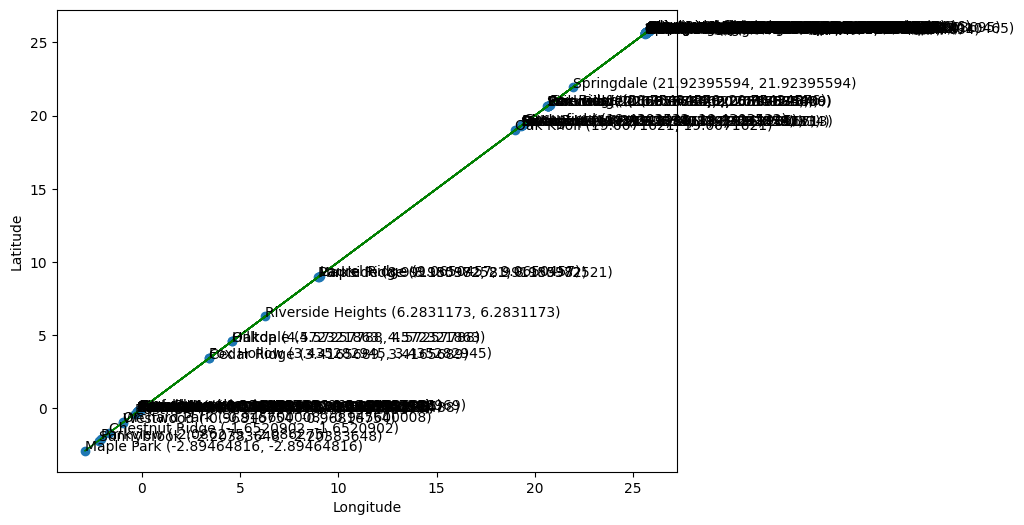

In [ ]:
import csv
import numpy as np
import math
import matplotlib.pyplot as plt

# Load data from CSV file
cities = []
with open('sim.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        cities.append(row)

# Define the distance function between two cities


def distance(city1, city2):
    lat1, lon1 = float(city1['latitude']), float(city1['longitude'])
    lat2, lon2 = float(city2['latitude']), float(city2['longitude'])
    R = 6371.0  # Earth's radius in km
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * \
        math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

# Define the fitness function for a particle


def fitness(pos):
    dist = 0.0
    for i in range(len(pos)-1):
        city1 = cities[pos[i]]
        city2 = cities[pos[i+1]]
        dist += distance(city1, city2)
    # Add distance between last and first cities (round trip)
    city1 = cities[pos[-1]]
    city2 = cities[pos[0]]
    dist += distance(city1, city2)
    return 1.0 / dist  # Minimize distance -> maximize fitness


# PSO parameters
n_particles = 50
n_cities = len(cities)
max_iter = 100
w = 0.5  # Inertia weight
c1 = 1.5  # Personal best weight
c2 = 1.5  # Global best weight

# Initialize particles
pos = np.zeros((n_particles, n_cities), dtype=int)
for i in range(n_particles):
    pos[i] = np.random.permutation(n_cities)

# Initialize personal and global best positions and fitness
pbest_pos = np.copy(pos)
pbest_fit = np.array([fitness(pos[i]) for i in range(n_particles)])
gbest_pos = np.copy(pos[pbest_fit.argmax()])
gbest_fit = pbest_fit.max()

# Main loop
for t in range(max_iter):
    # Update velocity and position of each particle
    for i in range(n_particles):
        r1, r2 = np.random.rand(2)
        vel = w * pos[i] + c1 * r1 * \
            (pbest_pos[i] - pos[i]) + c2 * r2 * (gbest_pos - pos[i])
        pos[i] = np.argsort(vel)
    # Evaluate fitness of each particle
    fit = np.array([fitness(pos[i]) for i in range(n_particles)])
    # Update personal and global best positions and fitness
    improved = fit > pbest_fit
    pbest_pos[improved] = np.copy(pos[improved])
    pbest_fit[improved] = fit[improved]
    if fit.max() > gbest_fit:
        gbest_pos = np.copy(pos[fit.argmax()])
        gbest_fit = fit.max()

# Print best solution found
print('Best solution found: {:.2f} km'.format(1.0 / gbest_fit))
# print('City sequence:', [cities
print('Best fitness value found: {:.2f}'.format(1.0 / gbest_fit))


# Extract the city sequence from the best solution
city_seq = [cities[i] for i in gbest_pos]

# Extract labels for latitude and longitude for each city
labels = [city['city'] + " (" + city['latitude'] +
          ", " + city['longitude'] + ")" for city in city_seq]

# Plot the cities on a map
lats = [float(city['latitude']) for city in city_seq]
lons = [float(city['longitude']) for city in city_seq]
plt.figure(figsize=(8, 6))
plt.scatter(lons, lats)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add labels for each city
for i, label in enumerate(labels):
    plt.annotate(label, (lons[i], lats[i]))

# Draw lines connecting the cities in the sequence
for i in range(len(city_seq)-1):
    city1 = city_seq[i]
    city2 = city_seq[i+1]
    plt.plot([float(city1['longitude']), float(city2['longitude'])],
             [float(city1['latitude']), float(city2['latitude'])], 'k-', lw=1, color='green')

# Draw a line connecting the last and first cities (round trip)
city1 = city_seq[-1]
city2 = city_seq[0]
plt.plot([float(city1['longitude']), float(city2['longitude'])],
         [float(city1['latitude']), float(city2['latitude'])], 'k-', lw=1 )

plt.show()